In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
results = pd.read_pickle('/Users/isdeniz/Documents/Documents_isdeniz/github/Summary-0207/msc_bug_enhancement_question/llama3_70b/msc_bug_enhancement_question_test_dataset_llama3_70b_prediction.pkl')
print(results.shape[0])

10537


In [3]:
results.head()

original_issue_title  \
0  Add @DirtiesContext "before modes" TEL to @IntegrationTest   
1                           Problem with a logical expression   
2                        2.0 Design: Performance Benchmarking   
3                        Possibly xml parsing issue [SPR-930]   
4                   [java] support `time` package like Python   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [4]:
results['llama3_70b_prediction'].value_counts()

llama3_70b_prediction
Bug                                         6288
Enhancement                                 3996
Others                                       205
Question                                      16
bug                                           15
enhancement                                    5
others                                         3
question                                       2
The categorization of this issue is: bug       1
configuration                                  1
Template                                       1
BUG                                            1
Enhancements                                   1
Support                                        1
Configuration                                  1
Name: count, dtype: int64

In [5]:
results['llama3_70b_prediction'].unique()

array(['Enhancement', 'Bug', 'Others', 'enhancement', 'bug', 'Question',
       'The categorization of this issue is: bug', 'configuration',
       'Template', 'others', 'question', 'BUG', 'Enhancements', 'Support',
       'Configuration'], dtype=object)

In [6]:
len(results['llama3_70b_prediction'].unique())

15

In [7]:
results['llama3_70b_prediction_organized'] = results['llama3_70b_prediction']

Arranging bug answers

In [8]:
bug_labels = {'Bug',
              'bug',
              'The categorization of this issue is: bug',
              'BUG'}

results['llama3_70b_prediction_organized'] = results['llama3_70b_prediction_organized'].replace(bug_labels, 'bug')

Arranging enhancement answers

In [9]:
enhancement_labels = {'Enhancement',
                      'enhancement',
                      'Enhancements'}

results['llama3_70b_prediction_organized'] = results['llama3_70b_prediction_organized'].replace(enhancement_labels, 'enhancement')

Arranging something else answers

In [10]:
something_else_labels = {'Others',
                         'Question',
                         'configuration',
                         'Template',
                         'others',
                         'question',
                         'Support',
                         'Configuration'}

results['llama3_70b_prediction_organized'] = results['llama3_70b_prediction_organized'].replace(something_else_labels, 'question')

In [11]:
len(results['llama3_70b_prediction_organized'].unique())

3

In [12]:
results['llama3_70b_prediction_organized'].unique()

array(['enhancement', 'bug', 'question'], dtype=object)

In [13]:
actual_labels = results['mapLabel']
predicted_labels = results['llama3_70b_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

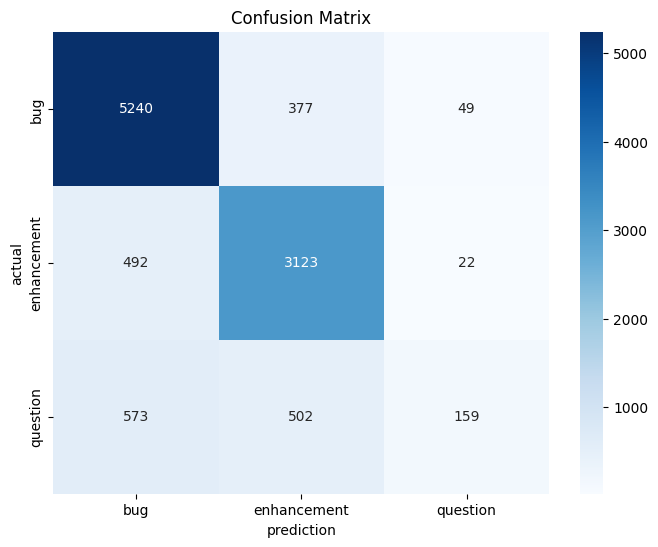

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.831     0.925     0.875      5666
 enhancement      0.780     0.859     0.818      3637
    question      0.691     0.129     0.217      1234

    accuracy                          0.809     10537
   macro avg      0.768     0.637     0.637     10537
weighted avg      0.797     0.809     0.778     10537



In [16]:
results.to_pickle('msc_bug_enhancement_question_test_dataset_llama3_70b_prediction_organized.pkl')